## Self-Supervised Autoencoding MNIST

In [1]:
import torch
import argparse
import MNIST_121 
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=8,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Encoder Design

### Layer-by-Layer Breakdown:

1. **First Convolution (1 → 8 channels)**  
   - What it does: Detects basic shapes in grayscale images  
   - Filter size: 3×3  
   - Stride: 2 to reduce spatial resolution  
   - Why: Lightweight and effective for MNIST (28×28)  

2. **Second Convolution (8 → 16 channels)**  
   - Learns more complex digit patterns  
   - Also uses 3×3 filters and stride 2  
   - Why: Doubles feature depth while reducing size again  

3. **Flatten + Linear (16×7×7 → 128)**  
   - Compresses features to a 128-dimensional latent vector  
   - Why: 128 is a good tradeoff between compactness and expressiveness  

---

## 2. Decoder Design

### How We Reconstruct:

1. **Linear (128 → 16×7×7)**  
   - Expands the latent space back into a 3D tensor  
   - Why: Rebuilds spatial structure from latent code  

2. **ConvTranspose2d (16 → 8 channels)**  
   - Upsamples the feature maps  
   - Why: Gradually brings back the original image size  

3. **ConvTranspose2d (8 → 1 channel)**  
   - Final grayscale image output  
   - Activation: Sigmoid to keep pixel values between 0–1  
   - Why: Matches MNIST format (1×28×28)  

---

## 3. Classifier Design

### Simple Classifier Structure:

- Takes 128-number latent vector as input  
- Fully connected layers: `128 → 64 → 10`  
- Activation: ReLU and Dropout (0.2)  
- Why: Enough capacity to classify digits without overfitting  

---

## 4. Training Choices

| Setting        | Our Choice | Why It Works                        |
|----------------|------------|-------------------------------------|
| Learning Rate  | 0.001      | Stable for Adam                     |
| Batch Size     | 128        | Balanced for MNIST and GPU usage    |
| Epochs         | 10         | Converges well on small datasets    |
| Optimizer      | Adam       | Fast and adaptive updates           |
| Dropout        | 0.2        | Helps prevent overfitting           |
| Loss Functions | MSE (AE), CE (Classifier) | Fits task objectives       |

---

## 5. Why This Works Well

1. **Simplicity with Purpose**  
   - The architecture is small but deep enough for MNIST  
   - Avoids overfitting while still learning useful representations  

2. **Effective Compression**  
   - Latent vector captures essential digit characteristics  
   - Decoder reconstructs well with just two layers  

3. **Good Transfer to Classification**  
   - Freezing encoder and training classifier gives strong results  
   - Reflects how well the encoder generalizes digit features  

In [2]:
train_loader, val_loader, test_loader = MNIST_121.load_data(args)
autoencoder = MNIST_121.Autoencoder(args.latent_dim).to(args.device)
classifier = MNIST_121.Classifier(args.latent_dim).to(args.device)

## Training Autoencoder

Epoch [1/30] | Train Loss: 0.0150 | Val Loss: 0.0052 | Test Loss: 0.0051


Epoch [2/30] | Train Loss: 0.0043 | Val Loss: 0.0037 | Test Loss: 0.0035


Epoch [3/30] | Train Loss: 0.0034 | Val Loss: 0.0031 | Test Loss: 0.0030


Epoch [4/30] | Train Loss: 0.0029 | Val Loss: 0.0027 | Test Loss: 0.0027


Epoch [5/30] | Train Loss: 0.0026 | Val Loss: 0.0026 | Test Loss: 0.0025


Epoch [6/30] | Train Loss: 0.0024 | Val Loss: 0.0024 | Test Loss: 0.0023


Epoch [7/30] | Train Loss: 0.0023 | Val Loss: 0.0022 | Test Loss: 0.0022


Epoch [8/30] | Train Loss: 0.0021 | Val Loss: 0.0021 | Test Loss: 0.0020


Epoch [9/30] | Train Loss: 0.0020 | Val Loss: 0.0021 | Test Loss: 0.0020


Epoch [10/30] | Train Loss: 0.0020 | Val Loss: 0.0019 | Test Loss: 0.0019


Epoch [11/30] | Train Loss: 0.0019 | Val Loss: 0.0019 | Test Loss: 0.0018


Epoch [12/30] | Train Loss: 0.0018 | Val Loss: 0.0018 | Test Loss: 0.0018


Epoch [13/30] | Train Loss: 0.0018 | Val Loss: 0.0018 | Test Loss: 0.0017


Epoch [14/30] | Train Loss: 0.0017 | Val Loss: 0.0018 | Test Loss: 0.0017


Epoch [15/30] | Train Loss: 0.0017 | Val Loss: 0.0017 | Test Loss: 0.0017


Epoch [16/30] | Train Loss: 0.0017 | Val Loss: 0.0017 | Test Loss: 0.0017


Epoch [17/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0016


Epoch [18/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0016


Epoch [19/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0016


Epoch [20/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [21/30] | Train Loss: 0.0015 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [22/30] | Train Loss: 0.0015 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [23/30] | Train Loss: 0.0015 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [24/30] | Train Loss: 0.0015 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [25/30] | Train Loss: 0.0015 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [26/30] | Train Loss: 0.0015 | Val Loss: 0.0015 | Test Loss: 0.0014


Epoch [27/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [28/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [29/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0014


Epoch [30/30] | Train Loss: 0.0014 | Val Loss: 0.0014 | Test Loss: 0.0014


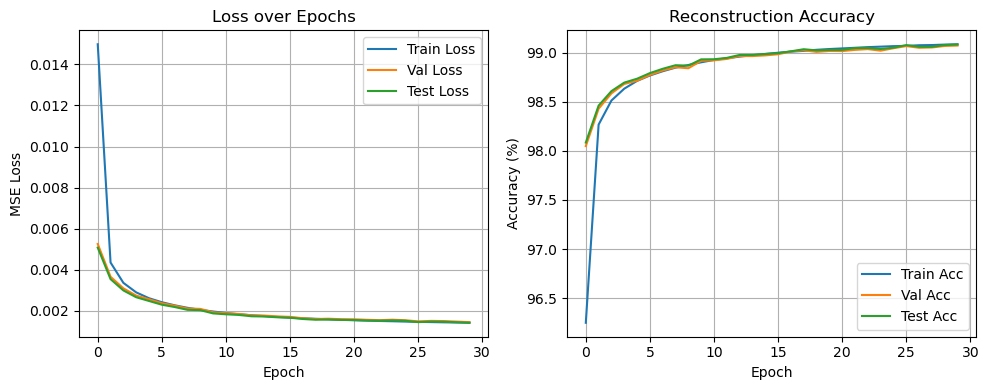

In [3]:
MNIST_121.train_autoencoder(autoencoder, train_loader, val_loader,test_loader, args, epochs=30)

## Training Classifier

Epoch [1/30], Train Acc: 90.11%, Val Acc: 95.04%, Test Acc: 95.32%


Epoch [2/30], Train Acc: 94.81%, Val Acc: 96.16%, Test Acc: 96.39%


Epoch [3/30], Train Acc: 95.59%, Val Acc: 96.40%, Test Acc: 96.84%


Epoch [4/30], Train Acc: 96.07%, Val Acc: 97.04%, Test Acc: 97.12%


Epoch [5/30], Train Acc: 96.24%, Val Acc: 97.08%, Test Acc: 97.27%


Epoch [6/30], Train Acc: 96.64%, Val Acc: 96.88%, Test Acc: 97.34%


Epoch [7/30], Train Acc: 96.58%, Val Acc: 97.06%, Test Acc: 97.36%


Epoch [8/30], Train Acc: 96.91%, Val Acc: 97.18%, Test Acc: 97.47%


Epoch [9/30], Train Acc: 96.96%, Val Acc: 97.08%, Test Acc: 97.57%


Epoch [10/30], Train Acc: 96.94%, Val Acc: 97.22%, Test Acc: 97.47%


Epoch [11/30], Train Acc: 97.08%, Val Acc: 97.17%, Test Acc: 97.48%


Epoch [12/30], Train Acc: 97.21%, Val Acc: 97.15%, Test Acc: 97.47%


Epoch [13/30], Train Acc: 97.19%, Val Acc: 97.26%, Test Acc: 97.60%


Epoch [14/30], Train Acc: 97.28%, Val Acc: 97.34%, Test Acc: 97.54%


Epoch [15/30], Train Acc: 97.31%, Val Acc: 97.15%, Test Acc: 97.51%


Epoch [16/30], Train Acc: 97.27%, Val Acc: 97.40%, Test Acc: 97.61%


Epoch [17/30], Train Acc: 97.39%, Val Acc: 97.24%, Test Acc: 97.74%


Epoch [18/30], Train Acc: 97.41%, Val Acc: 97.27%, Test Acc: 97.60%


Epoch [19/30], Train Acc: 97.36%, Val Acc: 97.17%, Test Acc: 97.48%


Epoch [20/30], Train Acc: 97.46%, Val Acc: 97.20%, Test Acc: 97.48%


Epoch [21/30], Train Acc: 97.56%, Val Acc: 97.14%, Test Acc: 97.45%


Epoch [22/30], Train Acc: 97.54%, Val Acc: 97.17%, Test Acc: 97.67%


Epoch [23/30], Train Acc: 97.55%, Val Acc: 97.24%, Test Acc: 97.45%


Epoch [24/30], Train Acc: 97.62%, Val Acc: 97.17%, Test Acc: 97.59%


Epoch [25/30], Train Acc: 97.58%, Val Acc: 97.08%, Test Acc: 97.69%


Epoch [26/30], Train Acc: 97.57%, Val Acc: 97.16%, Test Acc: 97.51%


Epoch [27/30], Train Acc: 97.72%, Val Acc: 97.06%, Test Acc: 97.57%


Epoch [28/30], Train Acc: 97.48%, Val Acc: 97.16%, Test Acc: 97.58%


Epoch [29/30], Train Acc: 97.76%, Val Acc: 97.05%, Test Acc: 97.43%


Epoch [30/30], Train Acc: 97.61%, Val Acc: 97.03%, Test Acc: 97.46%


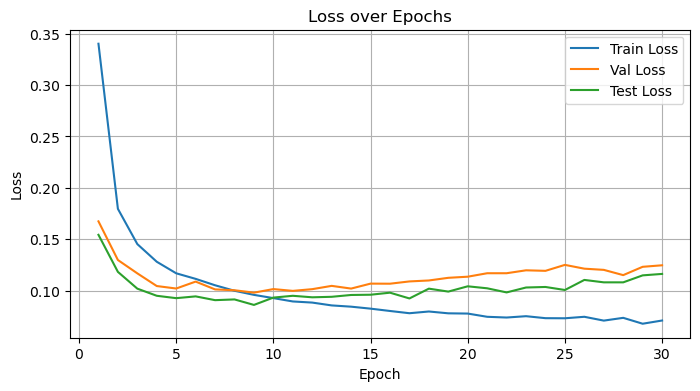

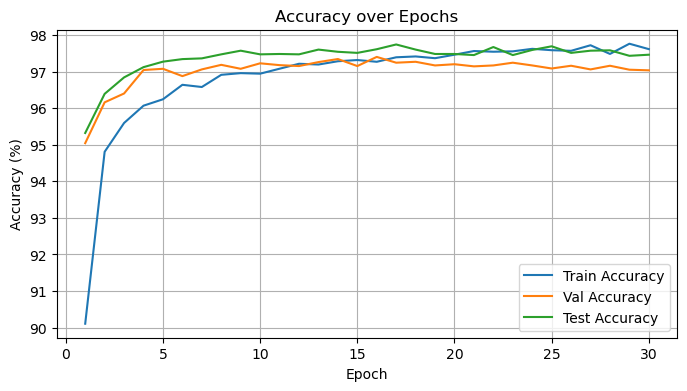

In [4]:
MNIST_121.train_classifier(autoencoder, classifier, train_loader, val_loader,test_loader, args, epochs=30)

## CIFAR-10 Reconstructions

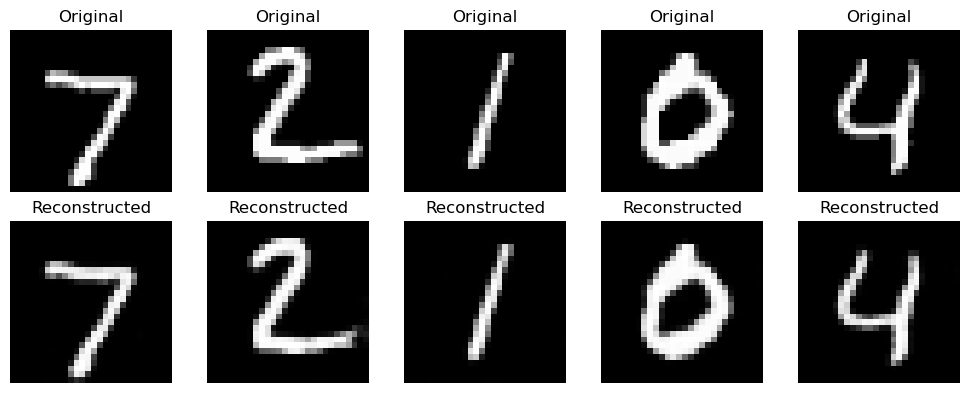

In [5]:
MNIST_121.visualize_reconstructions(autoencoder, test_loader, args.device)

## Linear Interpolation

In [ ]:
MNIST_121.linear_interpolation_mnist(autoencoder, test_loader, args.device)

## t-SNE Analysis of Latent Spaces

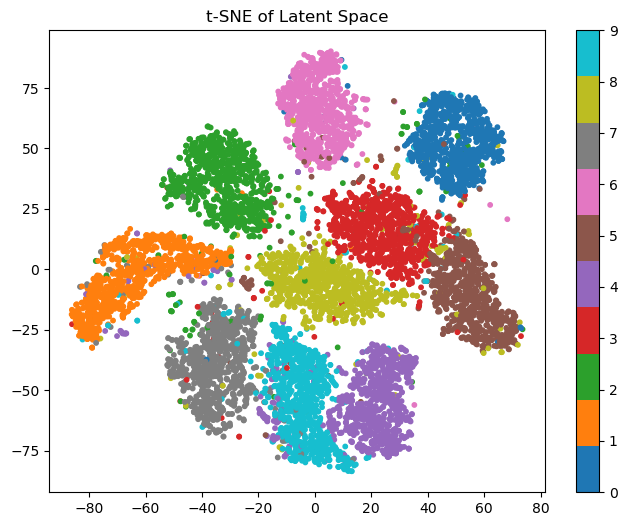

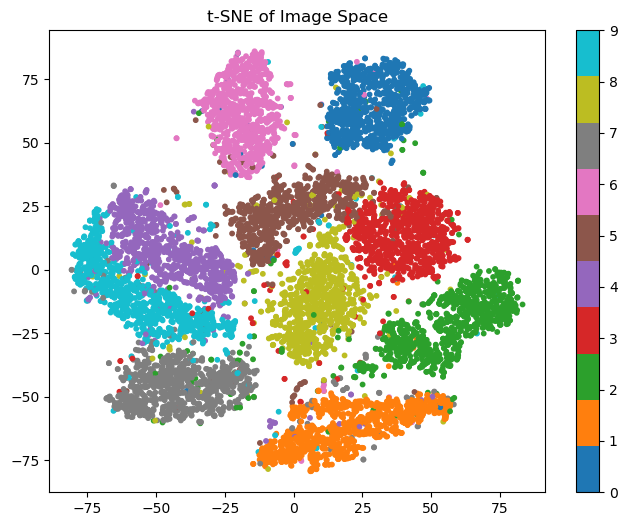

In [6]:
MNIST_121.plot_tsne(autoencoder, test_loader, args.device)